In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [52]:
transformer_train = transforms.Compose([
    # torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomCrop(32, padding=4),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    # torchvision.transforms.RandomRotation(degrees=15),
    torchvision.transforms.RandomAffine(0, translate=(0.1, 0.1)),
    # torchvision.transforms.RandomPerspective(),
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(root='.',
                                                train=True,
                                                transform=transforms.ToTensor(),
                                                download=True)

test_dataset = torchvision.datasets.CIFAR10(root='.',
                                                train=False,
                                                transform=transforms.ToTensor(),
                                                download=True)

170499072it [00:17, 9766693.29it/s]                                


Extracting .\cifar-10-python.tar.gz to .
Files already downloaded and verified


In [53]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [54]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [55]:
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [56]:
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


In [57]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [58]:
train_dataset_fixed = torchvision.datasets.CIFAR10(root='.',
                                                    train=True, 
                                                    transform=transforms.ToTensor(),
                                                    download=True)

train_loader_fixed = torch.utils.data.DataLoader(dataset=train_dataset_fixed,
                                                    batch_size=batch_size,
                                                    shuffle=False)

Files already downloaded and verified


In [59]:
temp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=1,
                                          shuffle=True)

for x, y in temp_loader:
    print(x)
    print(x.shape)
    break


tensor([[[[0.4549, 0.4706, 0.4784,  ..., 0.4275, 0.4196, 0.4157],
          [0.4863, 0.4902, 0.4980,  ..., 0.4431, 0.4314, 0.4275],
          [0.5255, 0.5294, 0.5412,  ..., 0.4588, 0.4510, 0.4431],
          ...,
          [0.4000, 0.4078, 0.4118,  ..., 0.1922, 0.3529, 0.3647],
          [0.3647, 0.3412, 0.2941,  ..., 0.3373, 0.3686, 0.3569],
          [0.2118, 0.1725, 0.1922,  ..., 0.3765, 0.3608, 0.3529]],

         [[0.5059, 0.5176, 0.5255,  ..., 0.4863, 0.4824, 0.4784],
          [0.5216, 0.5255, 0.5294,  ..., 0.5020, 0.4980, 0.4902],
          [0.5412, 0.5451, 0.5569,  ..., 0.5176, 0.5176, 0.5098],
          ...,
          [0.3725, 0.3765, 0.3843,  ..., 0.1647, 0.3294, 0.3451],
          [0.3529, 0.3294, 0.2784,  ..., 0.3098, 0.3451, 0.3373],
          [0.2118, 0.1647, 0.1725,  ..., 0.3451, 0.3373, 0.3255]],

         [[0.5765, 0.6000, 0.6196,  ..., 0.6784, 0.6745, 0.6706],
          [0.5098, 0.5294, 0.5490,  ..., 0.7059, 0.6980, 0.6941],
          [0.5412, 0.5608, 0.5804,  ..., 0

In [60]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
        )

        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, K)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2)
        x = self.fc2(x)
        return x

In [61]:
model = CNN(K)

In [62]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [64]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

        train_loss = np.mean(train_loss)

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(
            f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}')

    return train_losses, test_losses

In [65]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=80)

Epoch 1/80, Train Loss: 1.2438, Test Loss: 0.9456, Duration: 0:01:50.226543
Epoch 2/80, Train Loss: 0.8090, Test Loss: 0.8218, Duration: 0:01:50.977037
Epoch 3/80, Train Loss: 0.6595, Test Loss: 0.7604, Duration: 0:01:49.787551
Epoch 4/80, Train Loss: 0.5588, Test Loss: 0.8213, Duration: 0:01:49.041150
Epoch 5/80, Train Loss: 0.4826, Test Loss: 0.7166, Duration: 0:01:50.889929
Epoch 6/80, Train Loss: 0.4258, Test Loss: 0.6600, Duration: 0:01:50.178848
Epoch 7/80, Train Loss: 0.3771, Test Loss: 0.7055, Duration: 0:01:47.688270
Epoch 8/80, Train Loss: 0.3275, Test Loss: 0.6697, Duration: 0:01:44.423002
Epoch 9/80, Train Loss: 0.2915, Test Loss: 0.6713, Duration: 0:01:44.655000
Epoch 10/80, Train Loss: 0.2706, Test Loss: 0.7065, Duration: 0:01:44.938001
Epoch 11/80, Train Loss: 0.2469, Test Loss: 0.6864, Duration: 0:01:44.733998
Epoch 12/80, Train Loss: 0.2213, Test Loss: 0.7783, Duration: 0:01:45.008999
Epoch 13/80, Train Loss: 0.2060, Test Loss: 0.7947, Duration: 0:01:44.940001
Epoch 14

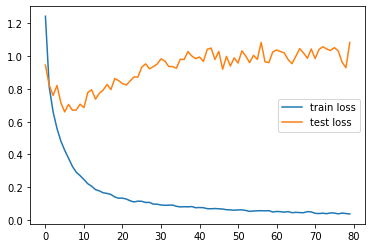

In [66]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [67]:
model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct/n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct/n_total
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.9904, Test acc: 0.8391


In [68]:
import sklearn.metrics as confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[835  20  29  25   6   1   6   6  46  26]
 [  7 936   3   3   1   1   3   0   9  37]
 [ 55   1 719  58  39  51  47  17   6   7]
 [ 12   5  38 722  27 132  30  16   7  11]
 [  6   3  37  47 808  33  32  24   9   1]
 [  7   5  13 116  19 804  11  18   5   2]
 [  6   3  26  32  14  26 880   3   6   4]
 [  7   0  14  34  27  51   3 854   3   7]
 [ 36  13   7   8   5   2   1   1 910  17]
 [  9  62   1   6   1   3   4   3  15 896]]


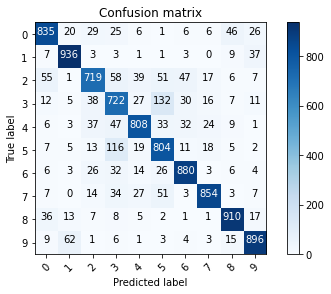

In [69]:
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix.confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [70]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

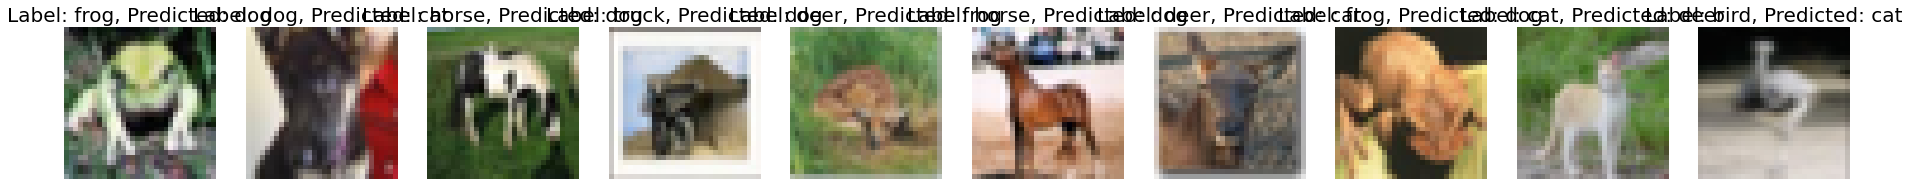

In [71]:
p_test = p_test.astype(np.uint8)
missclassified_idx = np.where(p_test != y_test)[0]
sample_idx = np.random.choice(missclassified_idx, 10, replace=False)
plt.figure(figsize=(32, 32))
for j, i in enumerate(sample_idx):
    plt.subplot(1, 10, j+1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(32, 32, 3), cmap='gray')
    plt.title(f'Label: {labels[y_test[i]]}, Predicted: {labels[p_test[i]]}', fontsize=20)

In [72]:
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6